<a href="https://colab.research.google.com/github/rajibmondal/Projects.NLP/blob/master/NLP_with_Disaster_Tweets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
bs=128

In [35]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/'
base_dir = root_dir + 'weights/Disaster_NLP'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = Path(base_dir)

In [37]:
# check if the dirctory exists if not make it
import os
if not (os.path.exists(base_dir)):
  base_dir.mkdir(parents=True, exist_ok=True)
base_dir

PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP')

In [38]:
path = Path('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets')
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_clas.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.pkl')

In [18]:
df = pd.read_csv(path/'clean_train.csv')
df.head()


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
data_clas = (TextList
           .from_csv(path, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch


In [20]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0
xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,0


In [24]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '/']

In [26]:
[(v, i) for i, v in enumerate(data_clas.vocab.stoi)][:100]

[('xxunk', 0),
 ('xxpad', 1),
 ('xxbos', 2),
 ('xxeos', 3),
 ('xxfld', 4),
 ('xxmaj', 5),
 ('xxup', 6),
 ('xxrep', 7),
 ('xxwrep', 8),
 ('/', 9),
 (':', 10),
 ('t.co', 11),
 ('http', 12),
 ('#', 13),
 ('the', 14),
 ('.', 15),
 ('a', 16),
 ('in', 17),
 ('to', 18),
 ('of', 19),
 ('i', 20),
 ('?', 21),
 ('and', 22),
 ('-', 23),
 ("'", 24),
 ('!', 25),
 ('is', 26),
 ('...', 27),
 ('you', 28),
 ('for', 29),
 ('on', 30),
 ("'s", 31),
 ('it', 32),
 ('my', 33),
 ('&', 34),
 ('\n ', 35),
 ('that', 36),
 ('with', 37),
 ('at', 38),
 ('by', 39),
 ('this', 40),
 ("n't", 41),
 ('https', 42),
 ('from', 43),
 ('_', 44),
 ('are', 45),
 ('was', 46),
 ('be', 47),
 ('have', 48),
 ('do', 49),
 ('like', 50),
 ('4', 51),
 ('as', 52),
 ('(', 53),
 (')', 54),
 ('up', 55),
 ('me', 56),
 ('but', 57),
 ('so', 58),
 ('just', 59),
 ('not', 60),
 ('your', 61),
 ('out', 62),
 ('we', 63),
 ('has', 64),
 ('all', 65),
 ('after', 66),
 ('no', 67),
 ('will', 68),
 ('fire', 69),
 ('an', 70),
 ('if', 71),
 ("'m", 72),
 ('wh

In [30]:
data_clas.train_ds[100]

(Text xxbos xxunk i m speaking from someone that is using a xxunk on xxunk most of them people will end up getting on for ps also .,
 Category 0)

In [32]:
data_clas.train_ds[100][0].data[:100]

array([   2,    0,   20,  148, 2687,   43,  380,   36,   26, 1160,   16,    0,   30,    0,  247,   19,  126,   87,
         68,  333,   55,  255,   30,   29, 2287,  349,   15])

In [12]:
data_lm.show_batch()

text,target
xxbos 1,Investigators shift focus to cause of fatal Waimate fire http://t.co/c9dVDsSoFn
xxbos 1,India floods derail two trains killing 21 people http://t.co/2Fs649QdWX
xxbos 1,A Look at State Actions a Year After #Ferguson's Upheaval http://t.co/qwSbVfLPE1
xxbos 1,Tonight we have attended a fire in Romford with @LondonFire thankfully no injuries http://t.co/iyjeJop2WI
xxbos 0,Both kids got haircuts w minimal trauma. Clearly that calls for wine


In [39]:
%time
data_lm = (TextList
           .from_csv(path, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


In [41]:
%%time
data_lm.save(base_dir/'data_lm.pkl')

CPU times: user 133 ms, sys: 0 ns, total: 133 ms
Wall time: 141 ms


In [0]:
data_lm = load_data(base_dir, 'data_lm.pkl', bs=bs)

In [43]:
data_lm.show_batch()

idx,text
0,fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj xxunk xxunk xxmaj colorado xxmaj springs areas xxbos i 'm afraid that the tornado is coming to our area ... xxbos # raining # flooding # xxmaj florida # xxunk # xxmaj xxunk 18 or 19 days . i 've lost xxunk xxbos xxmaj damage to school bus on
1,/ / t.co / xxunk xxmaj click here if you 've been in a crash > http : / / t.co / xxunk xxbos xxmaj accident in # xxmaj xxunk on xxup us 23 xxup sb before xxup xxunk xxunk # traffic http : / / t.co / xxunk xxbos xxmaj xxunk accident : xxmaj motorcyclist xxmaj dies in xxup xxunk xxmaj crash xxmaj with xxmaj car xxmaj that xxmaj
2,experts on xxmaj xxunk ... http : / / t.co / xxunk xxbos xxunk a xxrep 4 w they 're on an airplane accident and they 're gon na die what a xxunk xxrep 4 ? good job ! xxbos family members of xxunk bin laden have died in an airplane accident how xxunk xxrep 6 ? xxunk gov shit i suspect xxbos xxmaj man xxmaj goes into xxmaj airplane
3,xxunk xxbos xxup happening xxup now - xxup xxunk xxup ems xxup ambulance xxup xxunk xxup with xxup dual xxup sirens xxup xxunk _ https : / / t.co / xxunk xxbos http : / / t.co / xxunk xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / / t.co / xxunk xxbos http : / / t.co / xxup xxunk xxmaj twelve feared killed
4,laws of the xxunk false xxunk xxunk nations xxunk self annihilation xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... https : / / t.co / xxunk via @change xxbos xxmaj the annihilation of xxmaj jeb xxmaj christie & & xxmaj xxunk is less than 24 hours


##Training a Language Model with Transer Learning

In [44]:
# drop_mult speifies the amount of dropout to apply
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


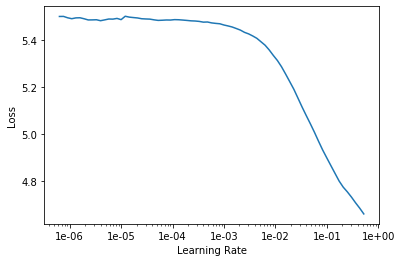

In [45]:
learn.lr_find()
# skip the last 15 learning rates in the plot so we can get a better visualization
learn.recorder.plot(skip_end=15)

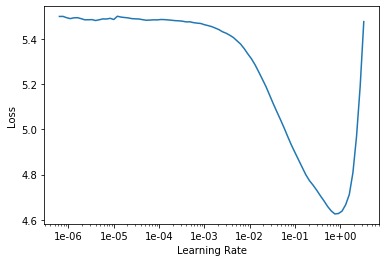

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.948481,3.190597,0.451451,00:03


In [49]:
%%time
learn.export(base_dir/'fit_head.pkl')

CPU times: user 57.4 ms, sys: 83.6 ms, total: 141 ms
Wall time: 312 ms


In [50]:
learn = load_learner(base_dir, 'fit_head.pkl')

In [0]:
learn.data = data_lm

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 2.75E-03


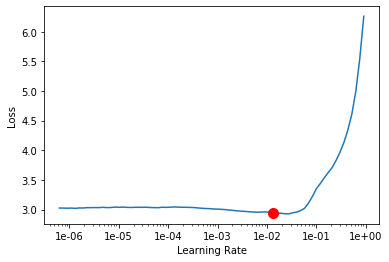

In [55]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Min numerical gradient: 2.09E-03
Min loss divided by 10: 6.31E-04


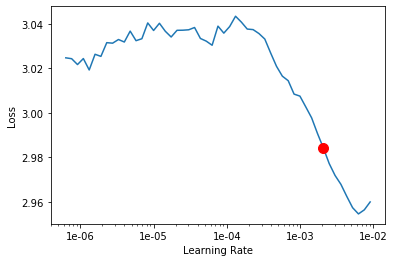

In [56]:
learn.recorder.plot(suggestion=True, skip_end=30)

In [0]:
from fastai.callbacks import *
import os
os.chdir(base_dir)

In [0]:
callbacks = [SaveModelCallback(learn, every='epoch', monitor='valid_loss', mode='auto', name='fine_tuned')]

In [59]:
learn.fit_one_cycle(10, 1e-02, moms=(0.8, 0.7), callbacks=callbacks)

epoch,train_loss,valid_loss,accuracy,time
0,2.898353,2.965077,0.478497,00:04
1,2.790610,3.311486,0.398549,00:04
2,2.624366,2.968704,0.489881,00:04
3,2.308012,3.088378,0.492485,00:04
4,1.948306,3.203605,0.491704,00:04
5,1.634163,3.296428,0.494382,00:04
6,1.316605,3.360878,0.495461,00:04
7,1.059022,3.351959,0.496429,00:04
8,0.872824,3.340422,0.497619,00:04
9,0.755530,3.338283,0.495722,00:04


In [60]:
(base_dir/'models').ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/tmp.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_0.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_1.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_2.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_3.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_4.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_5.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_6.pth'),
 PosixPath('/content/driv

In [61]:
learn.load('fine_tuned_8')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (6852 items)
x: LMTextList
xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxunk people xxunk # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school,xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires,xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj xxunk xxunk xxmaj colorado xxmaj springs areas
y: LMLabelList
,,,,
Path: /content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets;

Valid: LabelList (761 items)
x: LMTextList
xxbos http : / / t.co / xxunk xxmaj rescued xxmaj med migrants arrive in xxmaj sicily : xxmaj hundreds of migrants xxunk _ http : / / t.co / xxunk,xxbos holy crap xxunk my phone just exploded . haha,xxbos xxup xxunk xxup only xxup xxunk xx

##Language Model Prediction

In [0]:
WORD = 'The fire'
# how many next words do we want to predict
NUM_OF_NEW_WORDS = 20
# Specify the number of sentences that the model can make using the WORD as a starter
NUM_OF_SENTENCES = 2

In [66]:
print('\n'.join(learn.predict(WORD, NUM_OF_NEW_WORDS, temperature=0.60) for _ in range(NUM_OF_SENTENCES)))

The fire alarm went off today at work and we had to evacuate the building . xxbos It 's going on
The fire doors ( So Glorious a Ban Now Is Premature ) http : / /


In [77]:
%%time
learn.save_encoder('lm_fine_tuned_enc')

CPU times: user 26.6 ms, sys: 71.4 ms, total: 98 ms
Wall time: 307 ms


In [68]:
(base_dir/'models').ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/tmp.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_0.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_1.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_2.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_3.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_4.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_5.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/weights/Disaster_NLP/models/fine_tuned_6.pth'),
 PosixPath('/content/driv

In [69]:
# let's see the number of unique words from disaster tweet that are in our vocab
len(data_lm.vocab.itos)

4240

In [82]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_clas.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.pkl')

In [81]:
data_clas = (TextList
           .from_csv(path, vocab=data_lm.vocab,'clean_train.csv')#, cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch


# data_clas.save(base_dir/'data_clas.pkl')

SyntaxError: ignored

In [0]:
data_clas = load_data(base_dir, 'data_clas.pkl', bs=bs)

In [75]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup xxunk xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0
xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxup info xxup xxunk xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0


In [0]:
clas_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [78]:
clas_learn.load_encoder('lm_fine_tuned_enc')

RuntimeError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
from fastai.text import *
from fastai import *
bs = 128

In [0]:
data_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets'

path = Path(data_dir)

df = pd.read_csv(path/'clean_train.csv')
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
path.ls()
# df.shape

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data1_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean

In [0]:
# data_lm = (TextList.from_csv(path,'clean_train.csv')
#            #Inputs: all the text files in path
#             .filter_by_csv(include=['clean_train.csv']) 
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('data1_lm.pkl')

In [0]:
# # data_lm = (TextList.from_folder(path).filter_by_folder(include=['train','test'])
# # .split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=bs, num_workers=1))

# data_clas = (TextList
#            .from_csv(path, 'clean_train.csv', cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct()
#            #How to split it? Randomly with the default 20% in valid
#            .label_from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch

# data_clas.show_batch()

In [0]:
%time
data = (TextList
           .from_csv(path, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


In [0]:
data.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,/ xxunk xxbos xxunk xxmaj live xxmaj accident xxmaj xxunk xxbos xxup i-77 xxmaj mile xxmaj marker 31 xxmaj south xxmaj xxunk xxmaj xxunk xxmaj vehicle xxmaj accident xxmaj xxunk xxmaj closed at 8 / 6 xxunk xxup pm xxbos xxup rt xxunk : xxmaj sleeping xxunk double your risk of a car accident http : / / t.co / xxunk xxbos ' xxmaj by accident ' they knew what
2,gets the xxunk the second man gets the shell . ' xxmaj xxunk xxmaj xxunk xxbos xxmaj anyone need a p / u tonight ? i play xxmaj hybrid xxmaj slayer xxunk xxup eu . xxup xxunk xxunk xxunk xxunk xxup xxunk xxup xxunk xxunk xxbos xxmaj experts in xxmaj france begin examining airplane debris found on xxmaj reunion xxmaj island : xxmaj french air accident experts o ... http
3,choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxunk xxmaj check out what 's in my xxunk lot ! ! xxmaj he said that until last year it was an ambulance in xxmaj st xxmaj xxunk . http : / / t.co / xxunk xxbos # reuters xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http :
4,to save wild horses in xxmaj arizona . http : / / t.co / xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk m via @change xxbos xxunk xxmaj please check into xxmaj salt xxmaj river


In [0]:
data.save('data1_lm.pkl')

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data1_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean

In [0]:
data_lm = load_data(path, 'data1_lm.pkl', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,/ xxunk xxbos xxunk xxmaj live xxmaj accident xxmaj xxunk xxbos xxup i-77 xxmaj mile xxmaj marker 31 xxmaj south xxmaj xxunk xxmaj xxunk xxmaj vehicle xxmaj accident xxmaj xxunk xxmaj closed at 8 / 6 xxunk xxup pm xxbos xxup rt xxunk : xxmaj sleeping xxunk double your risk of a car accident http : / / t.co / xxunk xxbos ' xxmaj by accident ' they knew what
2,gets the xxunk the second man gets the shell . ' xxmaj xxunk xxmaj xxunk xxbos xxmaj anyone need a p / u tonight ? i play xxmaj hybrid xxmaj slayer xxunk xxup eu . xxup xxunk xxunk xxunk xxunk xxup xxunk xxup xxunk xxunk xxbos xxmaj experts in xxmaj france begin examining airplane debris found on xxmaj reunion xxmaj island : xxmaj french air accident experts o ... http
3,choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxunk xxmaj check out what 's in my xxunk lot ! ! xxmaj he said that until last year it was an ambulance in xxmaj st xxmaj xxunk . http : / / t.co / xxunk xxbos # reuters xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http :
4,to save wild horses in xxmaj arizona . http : / / t.co / xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk m via @change xxbos xxunk xxmaj please check into xxmaj salt xxmaj river


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


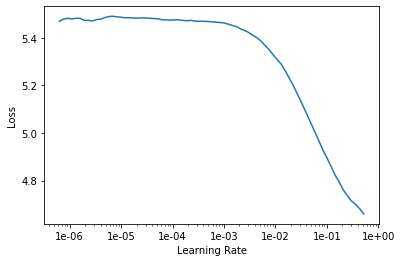

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
# learn.recorder.plot(skip_end=25)

In [0]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.955727,3.343127,0.431659,00:05


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.591631,3.113550,0.458728,00:07
1,2.521553,3.062801,0.466451,00:07
2,2.427628,3.017893,0.478504,00:07
3,2.336658,3.038552,0.478438,00:07
4,2.183128,3.066031,0.484263,00:07
5,2.043673,3.107359,0.483058,00:07
6,1.892451,3.183647,0.483549,00:07
7,1.752209,3.219073,0.482188,00:07
8,1.654099,3.239048,0.481384,00:07
9,1.570394,3.243961,0.481763,00:07


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "there is fire"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

there is fire on top of burning buildings and security acres . xxbos Police Officer Wounded Suspect Dead After Exchanging Shots - http : / / t.co / THOYHRHKFJ Fan Army #
there is fire between the two buildings for 2 buildings . There s buildings on fire that save all buildings and buildings on fire . xxbos Blamed for Missing Cree veterans in West Bank Windstorm


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data1_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean

In [0]:
# data_class = (TextList
#            .from_csv(path, 'clean_train.csv', cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct()
#            #How to split it? Randomly with the default 20% in valid
#            .label_from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch

###Classifier

In [0]:
data_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets'

path = Path(data_dir)

In [0]:
# data_lm = (TextList.from_folder(path).filter_by_folder(include=['train','test'])
# .split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=bs, num_workers=1))

data_clas = (TextList
           .from_csv(path1, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch


data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0
xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0


In [0]:
data_clas.vocab.itos = data_lm.vocab.itos

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.load_encoder('fine_tuned_enc')

RuntimeError: ignored

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


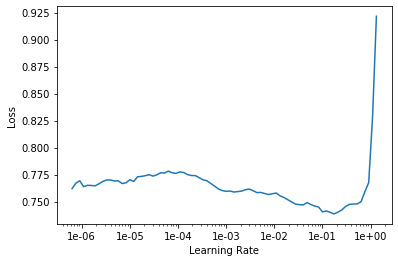

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.662938,0.650591,0.623522,00:03


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.650373,0.653224,0.591327,00:04


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.643979,0.680604,0.591327,00:06


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.617908,0.591076,0.676084,00:07
1,0.594383,0.575866,0.699080,00:07


In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/dat

##Clean DATA

In [0]:
df_train = pd.read_pickle(path/'train.pkl')
df_test = pd.read_pickle(path/'test.pkl')
df_train.head()

,id,keyword,location,text,target,text_cleaned,target_relabeled
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this # earthquake...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask . Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,All residents asked to ' shelter in place ' ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive # wildfires evacuation ...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby # Alaska a...,1


In [0]:
# # Convert pickle file to csv file

# import pickle        
# import base64

# your_pickle_obj = pickle.loads(open(path/'test.pkl', 'rb').read())
# with open('output.csv', 'a', encoding='utf8') as csv_file:
#     wr = csv.writer(csv_file, delimiter='|')
#     pickle_bytes = pickle.dumps(your_pickle_obj)            # unsafe to write
#     b64_bytes = base64.b64encode(pickle_bytes)  # safe to write but still bytes
#     b64_str = b64_bytes.decode('utf8')          # safe and in utf8
#     wr.writerow(['col1', 'col2', b64_str])


#     #not complete...........

In [0]:
# df_train[100:200]

In [0]:
# df_train.to_csv('full_clean_train.csv')
del df_train['location']
df_train.head()

,id,keyword,text,target,text_cleaned,target_relabeled
0,1,no_keyword,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this # earthquake...,1
1,4,no_keyword,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask . Canada,1
2,5,no_keyword,All residents asked to 'shelter in place' are ...,1,All residents asked to ' shelter in place ' ...,1
3,6,no_keyword,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive # wildfires evacuation ...",1
4,7,no_keyword,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby # Alaska a...,1


In [0]:
del df_train['keyword']
df_train.head()

,id,text,target,text_cleaned,target_relabeled
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this # earthquake...,1
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask . Canada,1
2,5,All residents asked to 'shelter in place' are ...,1,All residents asked to ' shelter in place ' ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive # wildfires evacuation ...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby # Alaska a...,1


In [0]:
del df_train['text']
df_train.head()

,id,target,text_cleaned,target_relabeled
0,1,1,Our Deeds are the Reason of this # earthquake...,1
1,4,1,Forest fire near La Ronge Sask . Canada,1
2,5,1,All residents asked to ' shelter in place ' ...,1
3,6,1,"13,000 people receive # wildfires evacuation ...",1
4,7,1,Just got sent this photo from Ruby # Alaska a...,1


In [0]:
del df_train['target']
df_train.head()

,id,text_cleaned,target_relabeled
0,1,Our Deeds are the Reason of this # earthquake...,1
1,4,Forest fire near La Ronge Sask . Canada,1
2,5,All residents asked to ' shelter in place ' ...,1
3,6,"13,000 people receive # wildfires evacuation ...",1
4,7,Just got sent this photo from Ruby # Alaska a...,1


In [0]:
del df_train['id']
df_train.head()

,text_cleaned,target_relabeled
0,Our Deeds are the Reason of this # earthquake...,1
1,Forest fire near La Ronge Sask . Canada,1
2,All residents asked to ' shelter in place ' ...,1
3,"13,000 people receive # wildfires evacuation ...",1
4,Just got sent this photo from Ruby # Alaska a...,1


In [0]:
TextDataBunch(df_train)

TypeError: ignored

In [0]:
data_c = (TextList
           
           .from_csv(path, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/dat